# PyTorch Intro
PyTorch Official Tutorial: https://pytorch.org/tutorials/

This file will be uploaded to the Homework repository.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

import pdb

In [2]:
import loader # a module (.py file) we created. Read for more information

basic_transformer = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainloader, validloader = loader.get_data_loader(basic_transformer, 
                                                  basic_transformer, 
                                                  batch_size)


torch.Size([32, 3, 30, 30])
torch.Size([32])
tensor([3, 0, 4, 1, 1, 4, 2, 2, 4, 1, 3, 2, 1, 1, 2, 0, 4, 0, 1, 4, 1, 1, 2, 2,
        2, 2, 2, 0, 1, 4, 2, 0])


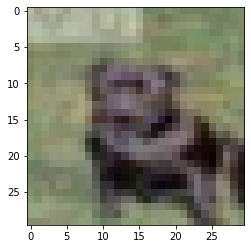

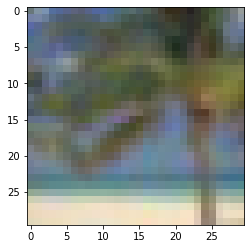

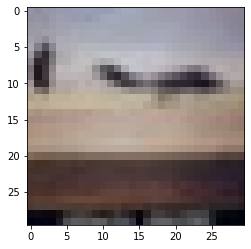

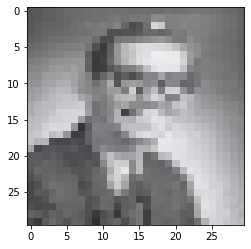

In [3]:
# [32, 3, 30, 30] = [batch size, channels, height, width]
for x, y in trainloader:
    print(x.shape)
    print(y.shape)
    print(y)
    break

# vis
for i in range(4):
    plt.imshow(np.transpose(x[i,:], (1,2,0))) # 30 x 30 x 3
    plt.show()


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # define the layers
        # kernel size = 3 means (3,3) kernel
        # rgb -> 3 -> in channel
        # number of feature maps = 16
        # number of filters = 3 x 16
        self.l1 = nn.Conv2d(kernel_size=3, in_channels=3, out_channels=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        # MaxPool2d, AvgPool2d. 
        # The first 2 = 2x2 kernel size, 
        # The second 2 means the stride=2
        
        self.l2 = nn.Conv2d(kernel_size=3, in_channels=16, out_channels=32)
        
        # FC layer
        self.fc1 = nn.Linear(32 * 6 * 6, 5) # IMPORTANT ! 
        # 32 (channels) * heigth in out (6) * width in out (6)
        
    def forward(self, x):
        # define the data flow through the deep learning layers
        
        # x = self.l1(x)
        # x = F.relu(x)
        # x = self.pool(x)
        # These three lines above will be equivalent to the following line
        
        x = self.pool(F.relu(self.l1(x))) # bs x 16 x 14 x 14. Width 30 ->(conv) 28 ->(pool) 14
        x = self.pool(F.relu(self.l2(x))) # bs x 32 x 6 x 6
        # print(x.shape)
        x = x.reshape(-1, 32*6*6) # [bs x 1152]# CRUCIAL!
        # print(x.shape)
        x = self.fc1(x)
        return x

In [5]:
m = CNN()
pred = m(x) # x is one batch of data [32, 3, 30, 30]
# pred is [32, 5] because we have 32 images and 5 classes
print(pred.shape)

torch.Size([32, 5])


In [6]:
print(pred)
print(torch.softmax(pred, dim=1))

tensor([[ 0.0540, -0.0029, -0.0238,  0.0294, -0.0435],
        [ 0.0378,  0.0306, -0.0058, -0.0267, -0.0561],
        [ 0.0959,  0.0194, -0.0199, -0.0021, -0.0275],
        [ 0.0584,  0.0511,  0.0029, -0.0154, -0.0855],
        [ 0.0541, -0.0010, -0.0046,  0.0047, -0.0419],
        [ 0.0219,  0.0355, -0.0228, -0.0040, -0.0524],
        [ 0.0402,  0.0186, -0.0136,  0.0489, -0.0691],
        [ 0.0301, -0.0189, -0.0084,  0.0041, -0.0337],
        [ 0.0605,  0.0147,  0.0011,  0.0181, -0.0513],
        [ 0.0639,  0.0242, -0.0155,  0.0144, -0.0866],
        [ 0.0680,  0.0355,  0.0041,  0.0164, -0.0427],
        [ 0.0533, -0.0065, -0.0315,  0.0539, -0.0961],
        [ 0.0789,  0.0351,  0.0220,  0.0161, -0.0333],
        [ 0.0804,  0.0321, -0.0197,  0.0095, -0.0467],
        [ 0.0312,  0.0066, -0.0302, -0.0086, -0.0555],
        [ 0.0538,  0.0126, -0.0387,  0.0231, -0.0281],
        [ 0.0590, -0.0036, -0.0201, -0.0090, -0.0618],
        [ 0.0535,  0.0106, -0.0317,  0.0321, -0.0502],
        [ 

# Training

In [7]:
criterion = nn.CrossEntropyLoss()
num_epoches = 2
import tqdm

import torch.optim as optim


USE_CUDA = torch.cuda.is_available()

if USE_CUDA:
    m = m.cuda()

In [8]:
for epoch_id in range(num_epoches):
    optimizer = optim.SGD(m.parameters(), lr=0.01 * 0.95 ** epoch_id)
    for x, y in tqdm.tqdm(trainloader):
        if USE_CUDA:
            x, y = x.cuda(), y.cuda()
        optimizer.zero_grad() # clear (reset) the gradient for the optimizer
        pred = m(x) # forward pass, will call forward(self, x) function.
        loss = criterion(pred, y)
        loss.backward() # Backward pass: calculating the gradient
        optimizer.step() # Updating the Parameters in backpropagation: optimize the model

100%|██████████| 391/391 [00:43<00:00,  8.97it/s]


# Testing

In [9]:
all_gt = []
all_pred = []

for x, y in tqdm.tqdm(validloader):
    if USE_CUDA:
        x, y = x.cuda(), y.cuda()
    all_gt += list(y.detach().cpu().numpy().reshape(-1))
    pred = torch.argmax(m(x), dim=1)
    all_pred += list(pred.detach().cpu().numpy().reshape(-1))
    
    

100%|██████████| 79/79 [00:07<00:00, 10.92it/s]


In [10]:
print(all_gt)
print(all_pred)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [11]:
acc = np.sum(np.array(all_gt) == np.array(all_pred)) / len(all_gt)
print("Accuracy is:", acc)

Accuracy is: 0.602
